In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing


In [3]:
housing = fetch_california_housing()



In [4]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [6]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [7]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.DataFrame(housing.target)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:


# y.head()

# y = np.ravel(y)

X = X.iloc[:,[0,5,6,7]]
X

,MedInc,AveOccup,Latitude,Longitude
0,8.3252,2.555556,37.88,-122.23
1,8.3014,2.109842,37.86,-122.22
2,7.2574,2.802260,37.85,-122.24
3,5.6431,2.547945,37.85,-122.25
4,3.8462,2.181467,37.85,-122.25
...,...,...,...,...
20635,1.5603,2.560606,39.48,-121.09
20636,2.5568,3.122807,39.49,-121.21
20637,1.7000,2.325635,39.43,-121.22
20638,1.8672,2.123209,39.43,-121.32


<BarContainer object of 20640 artists>

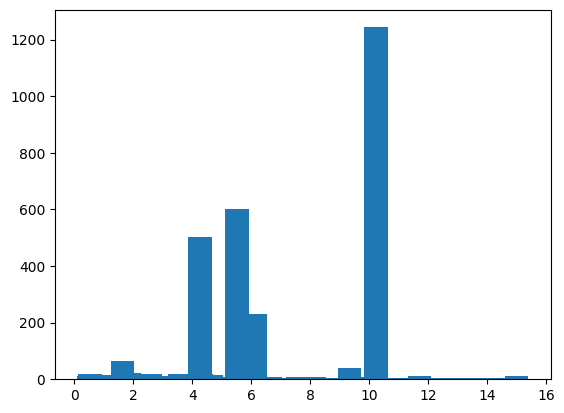

In [16]:
plt.bar(X.MedInc,X.AveOccup)

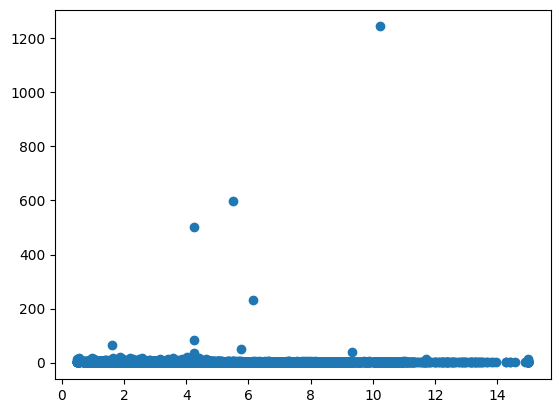

In [17]:
plt.scatter(X.MedInc,X.AveOccup)

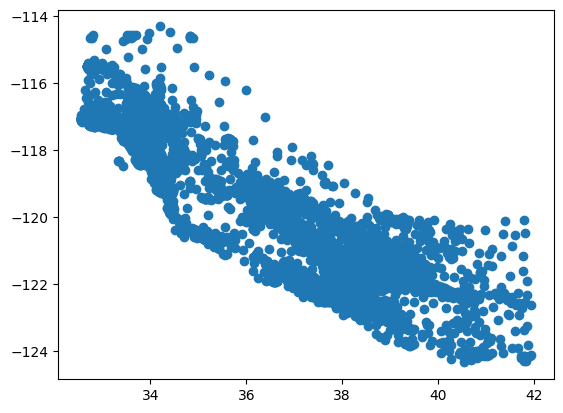

In [18]:
plt.scatter(X.Latitude	,X.Longitude)

In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestRegressor
y_train=y_train.values.flatten()
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("\nRandom Forest Regressor:")
acc = rf.score(X_test, y_test)
print(f"Accuracy score:{acc}")

print(rf.feature_importances_)


Random Forest Regressor:
Accuracy score:0.8036213884730199
[0.53896955 0.16225884 0.14790779 0.15086381]


In [13]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_1 = dt.predict(X_test)


print("\n Decision Tree Regressor:")
acc1 = dt.score(X_test, y_test)
print(f"Accuracy score:{acc1}")

print(dt.feature_importances_)


 Decision Tree Regressor:
Accuracy score:0.6465258595117944
[0.5331781  0.15517399 0.15612803 0.15551988]


In [ ]:
from sklearn.svm import SVR
y_train=y_train.values.flatten()
svr_model = SVR(C=3)
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_train)
print(svr_model.score(X_test, y_test))

0.5640279703796712
